In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sns.set_style("whitegrid")
df_final = pd.read_csv('final_data.csv')
df_baseline = pd.read_csv('baseline_data.csv')
df_strategies = pd.read_csv('strategies_data.csv')
df_messages = pd.read_csv('messages_data_final.csv')
df_daily = pd.read_csv('daily_data.csv')
df_daily = df_daily.dropna()

In [4]:
df = pd.concat([df_final, df_baseline, df_strategies, df_daily], axis=1)
df = df.dropna()

(27, 152)
0      0.0
1      0.0
2      0.0
3      0.0
8      0.0
18     0.0
19     0.0
21     0.0
29     0.0
32     0.0
39     0.0
45     0.0
50     0.0
67     2.0
73     1.0
84     0.0
85     0.0
88     0.0
97     4.0
99     0.0
100    0.0
107    0.0
112    0.0
119    1.0
121    0.0
122    0.0
123    0.0
Name: day 1_awake_lunch, dtype: float64


# Participant statistics

### Gender, age and experimental group distribution

In [5]:
male_age = df.loc[df['baselineD_sex'] == 'man', 'baselineD_age']
female_age = df.loc[df['baselineD_sex'] == 'vrouw', 'baselineD_age']

print 'Number of males:', (df.baselineD_sex == 'man').sum()
print 'Number of females:', (df.baselineD_sex == 'vrouw').sum()
print
print 'Average age males:', np.mean(male_age)
print 'Average age females:', np.mean(female_age)
print
print 'Min age males:', np.min(male_age)
print 'Max age males:', np.max(male_age)
print
print 'Min age females:', np.min(female_age)
print 'Max age females:', np.max(female_age)
print
print 'Average age total participants:', np.mean(df['baselineD_age'])
print
print 'Min age total participants:', np.min(df['baselineD_age'])
print 'Max age total participants:', np.max(df['baselineD_age'])

Number of males: 12
Number of females: 15

Average age males: 28.0
Average age females: 26.1333333333

Min age males: 20.0
Max age males: 49.0

Min age females: 18.0
Max age females: 44.0

Average age total participants: 26.962962963

Min age total participants: 18.0
Max age total participants: 49.0


1    10
2     8
4     5
3     4
Name: controlGroup, dtype: int64


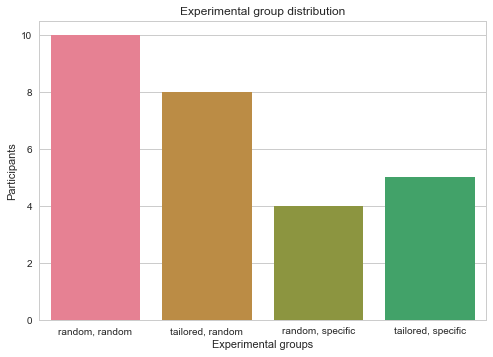

In [6]:
# Distribution of participants in groups that finished the baseline survey.
sns.set_palette("husl", 8)
group_distribution = df.controlGroup.value_counts()
print group_distribution
ax = sns.barplot(group_distribution.index, y=group_distribution)
ax.set(xlabel='Experimental groups', ylabel='Participants', title='Experimental group distribution')
ax.set_xticklabels(['random, random', 'tailored, random',
                   'random, specific', 'tailored, specific'])

In [7]:
group1 = df.query('controlGroup == 1')
group2 = df.query('controlGroup == 2')
group3 = df.query('controlGroup == 3')
group4 = df.query('controlGroup == 4')

tailored_group = pd.concat([group2, group4])
random_group = pd.concat([group1, group3])
locspec_group = pd.concat([group3, group4])
locrand_group = pd.concat([group1, group2])

### Distribution work/study place

4.0    17
1.0     9
3.0     1
Name: baselineD_location, dtype: int64


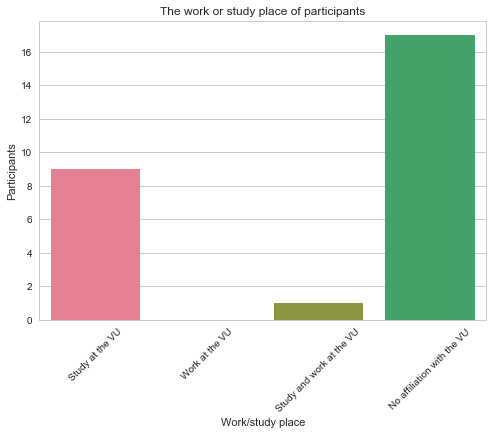

In [8]:
freq_location = df.baselineD_location.value_counts()
print freq_location
xvalues = dict(freq_location)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Work/study place', ylabel='Participants', title='The work or study place of participants')
ax.set_xticklabels(['Study at the VU', 'Work at the VU', 'Study and work at the VU', 
                    'No affiliation with the VU'], rotation=45)

4.0    5
1.0    3
3.0    1
Name: baselineD_location, dtype: int64


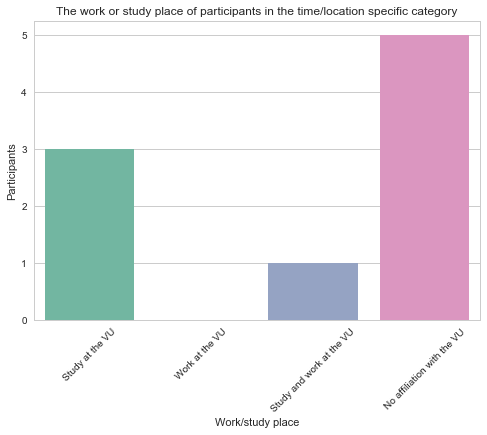

In [174]:
sns.set_palette("Set2", 10)
freq_locspec = locspec_group.baselineD_location.value_counts()
print freq_locspec
xvalues = dict(freq_locspec)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Work/study place', ylabel='Participants', title='The work or study place of participants in the time/location specific category')
ax.set_xticklabels(['Study at the VU', 'Work at the VU', 'Study and work at the VU', 
                    'No affiliation with the VU'], rotation=45)

## Snacking behavior before experiment

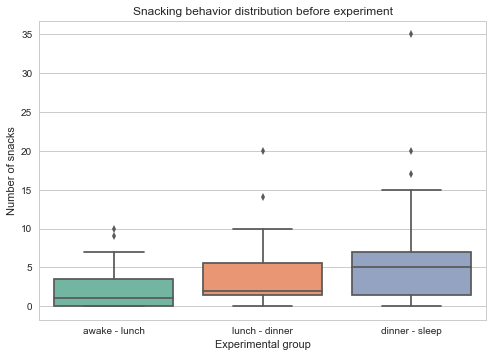

In [228]:
# oneday = df['baselineA_awake_lunch'] + df['baselineA_lunch_diner'] + df['baselineA_diner_sleep']
# g = sns.boxplot(y=oneday)
g = sns.boxplot(data=[df['baselineA_awake_lunch'], df['baselineA_lunch_diner'], df['baselineA_diner_sleep']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior distribution before experiment')
g.set_xticklabels(["awake - lunch", "lunch - dinner", "dinner - sleep"])


## Per time-frame

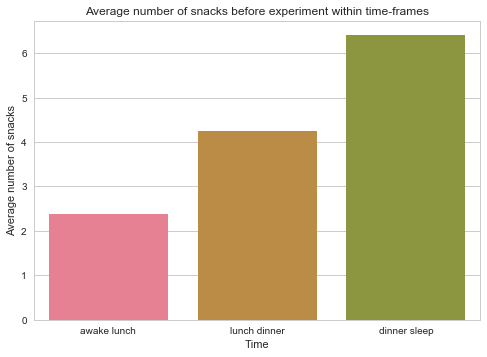

In [11]:
sns.set_palette("husl", 8)
total_snacks_awakelunch = np.mean(df['baselineA_awake_lunch'])
total_snacks_lunchdinner = np.mean(df['baselineA_lunch_diner'])
total_snacks_dinnersleep = np.mean(df['baselineA_diner_sleep'])
y = [total_snacks_awakelunch, total_snacks_lunchdinner, total_snacks_dinnersleep]
ax = sns.barplot(x=['awake lunch', 'lunch dinner', 'dinner sleep'], y=y)
ax.set(xlabel='Time', ylabel='Average number of snacks', title='Average number of snacks before experiment within time-frames')

[<matplotlib.text.Text at 0x11bc9e850>, <matplotlib.text.Text at 0x11bb2a9d0>]

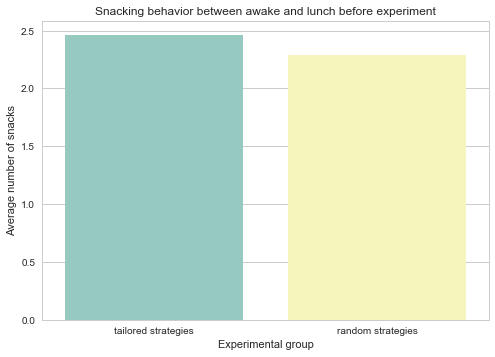

In [12]:
sns.set_palette("Set3", 10)
ax = sns.barplot(data=[tailored_group['baselineA_awake_lunch'], random_group['baselineA_awake_lunch']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between awake and lunch before experiment')
ax.set_xticklabels(["tailored strategies", "random strategies"])

[<matplotlib.text.Text at 0x11bce0090>, <matplotlib.text.Text at 0x11bf754d0>]

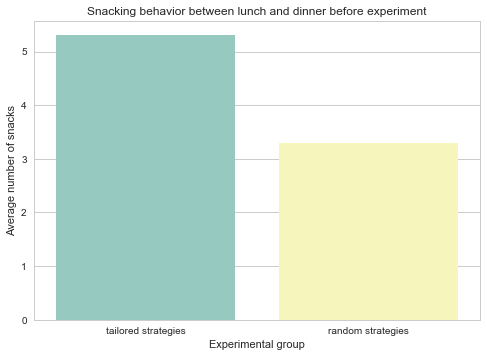

In [13]:
ax = sns.barplot(data=[tailored_group['baselineA_lunch_diner'], random_group['baselineA_lunch_diner']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between lunch and dinner before experiment')
ax.set_xticklabels(["tailored strategies", "random strategies"])

[<matplotlib.text.Text at 0x11c0e5550>, <matplotlib.text.Text at 0x11c0cb890>]

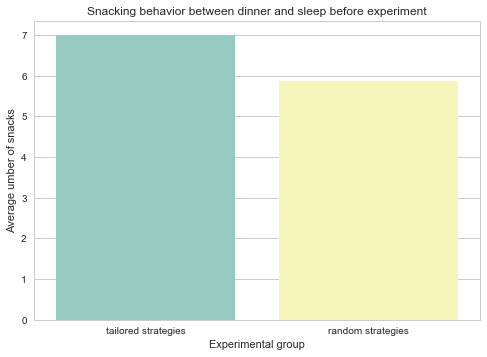

In [14]:
ax = sns.barplot(data=[tailored_group['baselineA_diner_sleep'], random_group['baselineA_diner_sleep']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average umber of snacks', title='Snacking behavior between dinner and sleep before experiment')
ax.set_xticklabels(["tailored strategies", "random strategies"])

[<matplotlib.text.Text at 0x11c0cb8d0>, <matplotlib.text.Text at 0x11bf80390>]

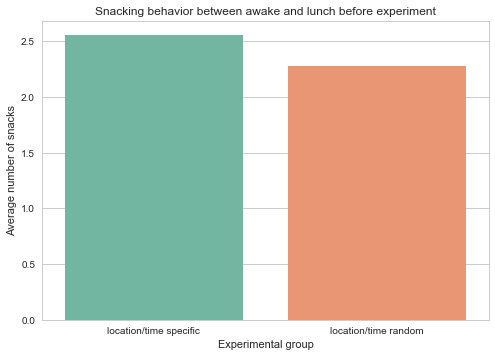

In [15]:
ax = sns.barplot(data=[locspec_group['baselineA_awake_lunch'], locrand_group['baselineA_awake_lunch']], palette="Set2", ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between awake and lunch before experiment')
ax.set_xticklabels(["location/time specific", "location/time random"])

[<matplotlib.text.Text at 0x11c3432d0>, <matplotlib.text.Text at 0x11c36e110>]

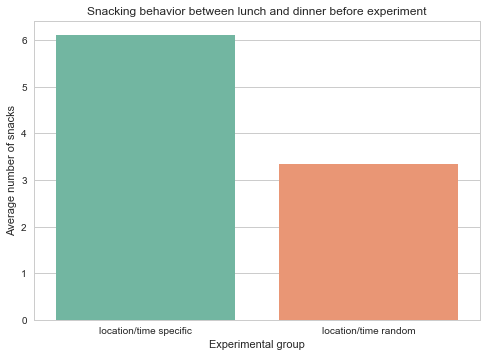

In [16]:
ax = sns.barplot(data=[locspec_group['baselineA_lunch_diner'], locrand_group['baselineA_lunch_diner']], palette="Set2", ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between lunch and dinner before experiment')
ax.set_xticklabels(["location/time specific", "location/time random"])

[<matplotlib.text.Text at 0x11c1f2290>, <matplotlib.text.Text at 0x11c4c5050>]

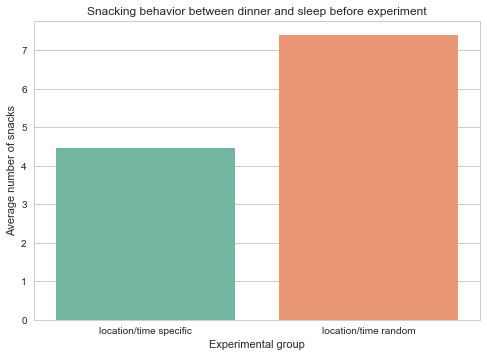

In [17]:
ax = sns.barplot(data=[locspec_group['baselineA_diner_sleep'], locrand_group['baselineA_diner_sleep']], palette="Set2", ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between dinner and sleep before experiment')
ax.set_xticklabels(["location/time specific", "location/time random"])

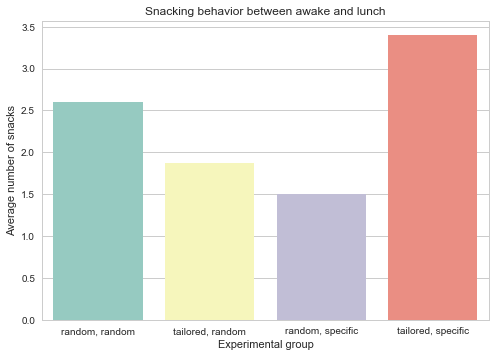

In [18]:
ax = sns.barplot(data=[group1['baselineA_awake_lunch'], group2['baselineA_awake_lunch'], 
                           group3['baselineA_awake_lunch'], group4['baselineA_awake_lunch']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between awake and lunch')
ax.set_xticklabels(['random, random', 'tailored, random',
                   'random, specific', 'tailored, specific'])

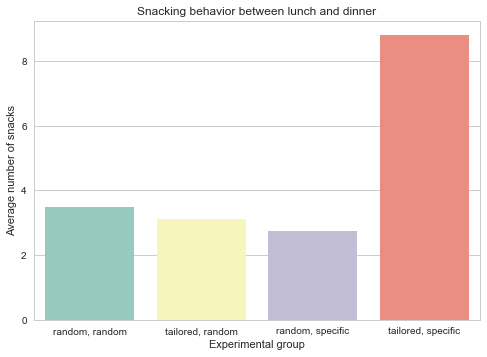

In [19]:
ax = sns.barplot(data=[group1['baselineA_lunch_diner'], group2['baselineA_lunch_diner'], 
                           group3['baselineA_lunch_diner'], group4['baselineA_lunch_diner']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between lunch and dinner')
ax.set_xticklabels(['random, random', 'tailored, random',
                   'random, specific', 'tailored, specific'])

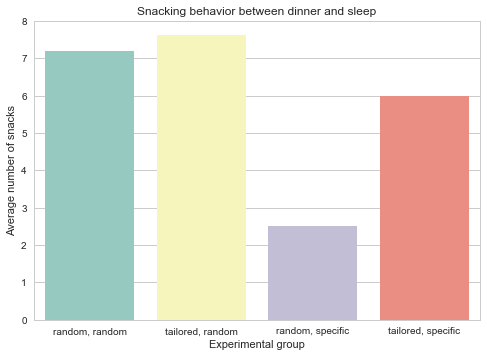

In [20]:
ax = sns.barplot(data=[group1['baselineA_diner_sleep'], group2['baselineA_diner_sleep'], 
                           group3['baselineA_diner_sleep'], group4['baselineA_diner_sleep']], ci=None)
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior between dinner and sleep')
ax.set_xticklabels(['random, random', 'tailored, random',
                   'random, specific', 'tailored, specific'])

## Per day

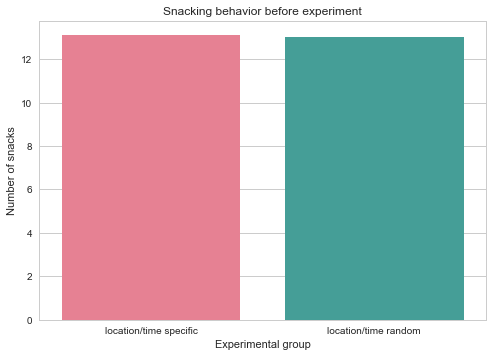

In [138]:
totalls = locspec_group['baselineA_awake_lunch'] + locspec_group['baselineA_lunch_diner'] + locspec_group['baselineA_diner_sleep']
totallr = locrand_group['baselineA_awake_lunch'] + locrand_group['baselineA_lunch_diner'] + locrand_group['baselineA_diner_sleep']

ax = sns.barplot(x=['location/time specific', 'location/time random'], y=[np.mean(totalls), np.mean(totallr)], palette="husl")
ax.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior before experiment')

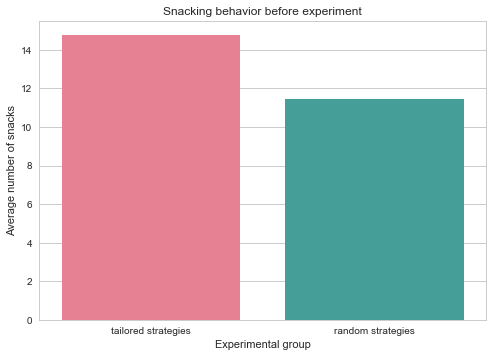

In [139]:
totalts = tailored_group['baselineA_awake_lunch'] + tailored_group['baselineA_lunch_diner'] + tailored_group['baselineA_diner_sleep']
totalrs = random_group['baselineA_awake_lunch'] + random_group['baselineA_lunch_diner'] + random_group['baselineA_diner_sleep']

ax = sns.barplot(x=['tailored strategies', 'random strategies'], y=[np.mean(totalts), np.mean(totalrs)], palette='husl')
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior before experiment')

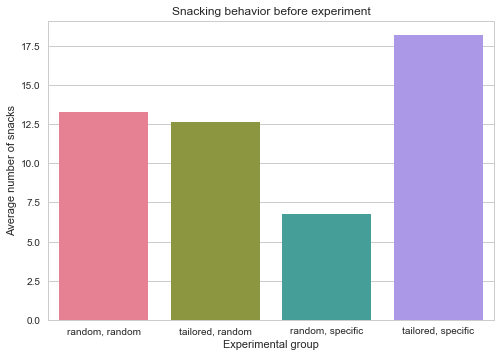

In [23]:
gr1 = np.mean(group1['baselineA_awake_lunch']) + np.mean(group1['baselineA_lunch_diner']) + np.mean(group1['baselineA_diner_sleep'])
gr2 = np.mean(group2['baselineA_awake_lunch']) + np.mean(group2['baselineA_lunch_diner']) + np.mean(group2['baselineA_diner_sleep'])
gr3 = np.mean(group3['baselineA_awake_lunch']) + np.mean(group3['baselineA_lunch_diner']) + np.mean(group3['baselineA_diner_sleep'])
gr4 = np.mean(group4['baselineA_awake_lunch']) + np.mean(group4['baselineA_lunch_diner']) + np.mean(group4['baselineA_diner_sleep'])

ax = sns.barplot(x=['random, random', 'tailored, random', 'random, specific', 'tailored, specific'], 
                 y=[gr1, gr2, gr3, gr4], palette='husl')
ax.set(xlabel='Experimental group', ylabel='Average number of snacks', title='Snacking behavior before experiment')

# Message statistics

13.5088859644
0.0
16.3305694941
10.979981785
average read messages group 1: 35.1
average read messages group 2: 28.0
average read messages group 3: 25.75
average read messages group 4: 29.8

total read messages group 1: 351.0
total read messages group 2: 28.0
total read messages group 3: 103.0
total read messages group 4: 149.0


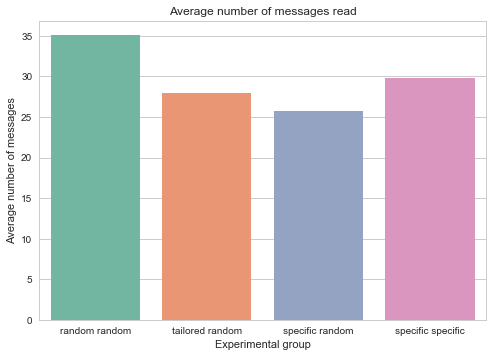

In [186]:
df_final = df_final.dropna()
df_final = pd.concat([df_messages, df_final], axis=1)

exp1 = df_messages.loc[df_messages['controlGroup'] == 1]
exp1 = exp1.count(axis=1)
exp1 = exp1 - 2
exp1 = exp1[exp1 != 0]
average_read_1 = np.mean(exp1 / 3)
sd_1 = np.std(exp1/3)
print sd_1
total_read1 = np.sum(exp1 / 3)

exp2 = df_messages.loc[df_messages['controlGroup'] == 2]
exp2 = exp2.count(axis=1)
exp2 = exp2 - 2
exp2 = exp2[exp2 != 0]
average_read_2 = np.mean(exp2 / 3)
sd_2 = np.std(exp2/3)
print sd_2
total_read2 = np.sum(exp2 / 3)

exp3 = df_messages.loc[df_messages['controlGroup'] == 3]
exp3 = exp3.count(axis=1)
exp3 = exp3 - 2
exp3 = exp3[exp3 != 0]
average_read_3 = np.mean(exp3 / 3)
sd_3 = np.std(exp3/3)
print sd_3
total_read3 = np.sum(exp3 / 3)

exp4 = df_messages.loc[df_messages['controlGroup'] == 4]
exp4 = exp4.count(axis=1)
exp4 = exp4 - 2
exp4 = exp4[exp4 != 0]
average_read_4 = np.mean(exp4 / 3)
sd_4 = np.std(exp4/3)
print sd_4
total_read4 = np.sum(exp4 / 3)

print 'average read messages group 1:', average_read_1
print 'average read messages group 2:', average_read_2
print 'average read messages group 3:', average_read_3
print 'average read messages group 4:', average_read_4
print
print 'total read messages group 1:', total_read1
print 'total read messages group 2:', total_read2
print 'total read messages group 3:', total_read3
print 'total read messages group 4:', total_read4

ax = sns.barplot(x=['random random', 'tailored random', 'specific random', 'specific specific'], 
                y = [average_read_1, average_read_2, average_read_3, average_read_4])
ax.set(xlabel='Experimental group', ylabel='Average number of messages', title='Average number of messages read')

In [25]:
dfgroup3 = df_messages.loc[df_messages['controlGroup'] == 3]
dfgroup3 = dfgroup3.dropna(axis=1, how='all')
headers3 = list(dfgroup3)
dfgroup4 = df_messages.loc[df_messages['controlGroup'] == 4]
dfgroup4 = dfgroup4.dropna(axis=1, how='all')
headers4 = list(dfgroup4)

def count(headers, group):
    beacon_headers = []
    gps_headers = []
    for i, header in enumerate(headers):
        if i + 1 < 48:
            continue
        splitted_header = header.split("_")
        id = splitted_header[0].split(" ")
        if int(id[1]) < 200:
            beacon_headers.append(header)
        else:
            gps_headers.append(header)
    return beacon_headers, gps_headers
    
beacon_headers3, gps_headers3 = count(headers3, 3)
beacon_headers4, gps_headers4 = count(headers4, 4)

totalbeacons3 = 0
totalgps3 = 0
totalbeacons4 = 0
totalgps4 = 0
for header in beacon_headers3:
    totalbeacons3 += dfgroup3[header].count()
    
for header in gps_headers3:
    totalgps3 += dfgroup3[header].count()
    
for header in beacon_headers4:
    totalbeacons4 += dfgroup4[header].count()
    
for header in gps_headers4:
    totalgps4 += dfgroup4[header].count()

print 'Amount of beacon messages read group 3:', totalbeacons3/3
print 'Amount of GPS messages read group 3:', totalgps3/3
print 'Amount of scheduled messages read group 3', total_read3 - (totalbeacons3/3 + totalgps3/3)
print 'Amount of beacon messages read group 4:', totalbeacons4/3
print 'Amount of GPS messages read group 4:', totalgps4/3
print 'Amount of scheduled messages read group 4', total_read4 - (totalbeacons4/3 + totalgps4/3)

Amount of beacon messages read group 3: 34
Amount of GPS messages read group 3: 19
Amount of scheduled messages read group 3 50.0
Amount of beacon messages read group 4: 46
Amount of GPS messages read group 4: 43
Amount of scheduled messages read group 4 60.0


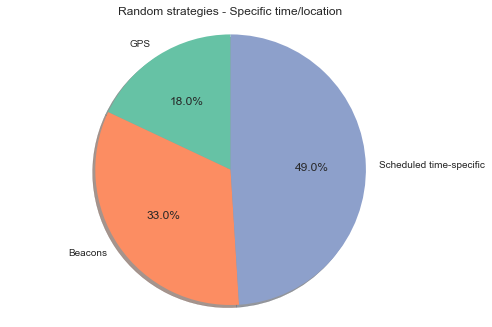

In [190]:
sizes = [18, 33, 49]
labels = 'GPS', 'Beacons', 'Scheduled time-specific'
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set(title='Random strategies - Specific time/location')

plt.show()

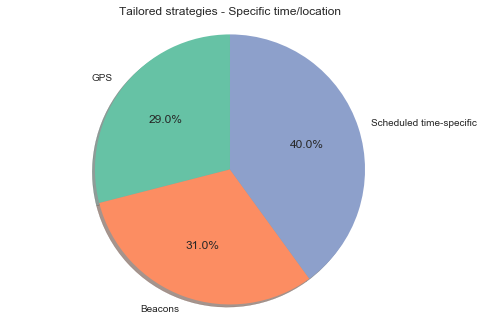

In [192]:
sizes = [29, 31, 40]
labels = 'GPS', 'Beacons', 'Scheduled time-specific'
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set(title='Tailored strategies - Specific time/location')

plt.show()

# Snacking behavior during experiment

In [230]:
for i in range(15):
    day = 'day_%d' % (i + 1)
    var1 = 'day %d_awake_lunch' % (i + 1)
    var2 = 'day %d_diner_sleep' % (i + 1)
    var3 = 'day %d_lunch_diner' % (i + 1)
    df[day] = df[var1] + df[var2] + df[var3]

1.75760155818
2.68869502413
3.23348393862
2.74873708375
2.18172984815
1.86881123134
1.93090524411
2.292110881
1.51354198087
3.86819893012
1.66295883857
1.93090524411
1.57744736586
1.47405546238
2.46512019145


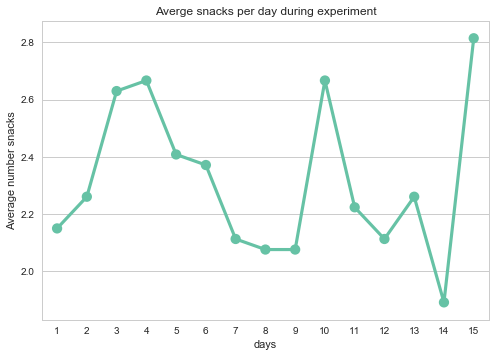

In [225]:
daily_averages = []
for i in range(15):
    day = 'day_%d' % (i + 1)
    daily_averages.append(np.mean(df[day]))
    print np.std(df[day])
    
ax = sns.pointplot(x=range(1,16), y=daily_averages)
ax.set(xlabel='days', ylabel='Average number snacks', title='Averge snacks per day during experiment')

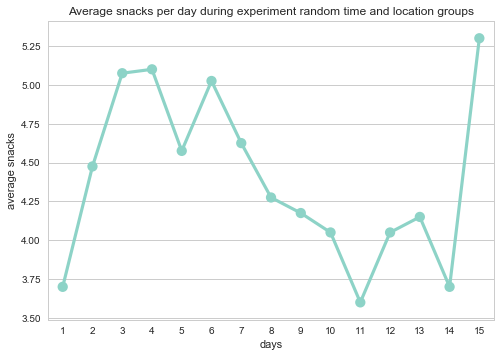

In [121]:
daily_randomtime = []
daily_specifictime = []
daily_randomstrat = []
daily_tailoredstrat = []

for i in range(15):
    day = 'day_%d' % (i + 1)
    averagerr = np.mean(df.loc[df['controlGroup'] == 1, day])
    averagert = np.mean(df.loc[df['controlGroup'] == 2, day])
    averagesr = np.mean(df.loc[df['controlGroup'] == 3, day])
    averagest = np.mean(df.loc[df['controlGroup'] == 4, day])
    daily_randomtime.append(averagerr + averagert)
    daily_specifictime.append(averagesr + averagest)
    daily_randomstrat.append(averagerr + averagesr)
    daily_tailoredstrat.append(averagert + averagest)


ax = sns.pointplot(x=range(1,16), y=daily_randomtime)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment random time and location groups')

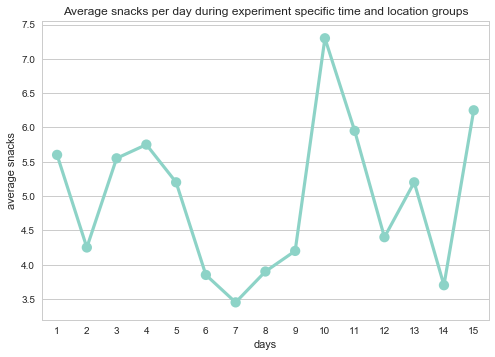

In [105]:
ax = sns.pointplot(x=range(1,16), y=daily_specifictime)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment specific time and location groups')

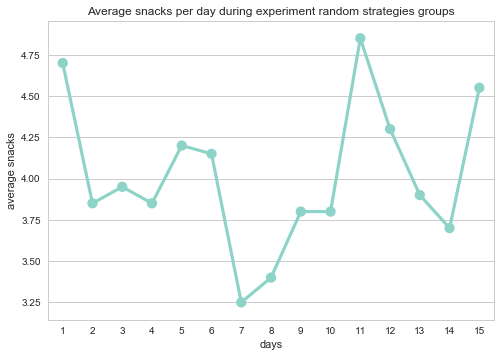

In [122]:
ax = sns.pointplot(x=range(1,16), y=daily_randomstrat)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment random strategies groups')

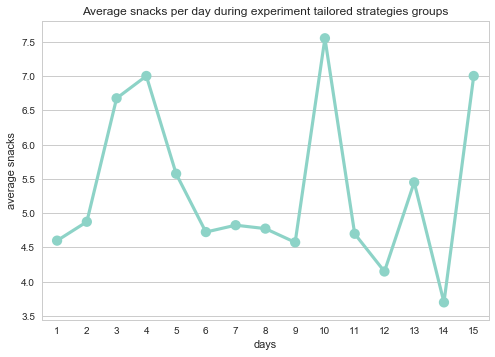

In [123]:
ax = sns.pointplot(x=range(1,16), y=daily_tailoredstrat)
ax.set(xlabel='days', ylabel='average snacks', title='Average snacks per day during experiment tailored strategies groups')

## Participants receiving timespecific morning

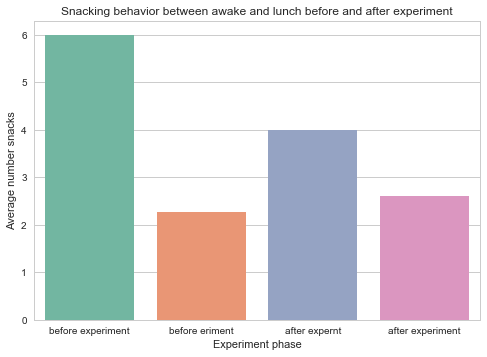

In [231]:
group1 = df.query('controlGroup == 1')
group2 = df.query('controlGroup == 2')
group3 = df.query('controlGroup == 3')
group4 = df.query('controlGroup == 4')

tailored_group = pd.concat([group2, group4])
random_group = pd.concat([group1, group3])
locspec_group = pd.concat([group3, group4])
locrand_group = pd.concat([group1, group2])

bef = np.mean(locrand_group['baselineA_awake_lunch'])
aft = np.mean(locrand_group['day_15'])

ax = sns.barplot(x=['before experiment', 'before eriment', 'after expernt', 'after experiment'], y=[(4 + 9)/2, bef,  (4 + 5)/2, aft])
ax.set(xlabel='Experiment phase', ylabel='Average number snacks', title='Snacking behavior between awake and lunch before and after experiment')

## Participants receiving timespecific afternoon

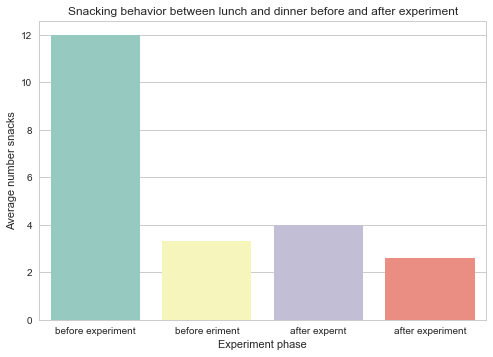

In [169]:
bef = np.mean(locrand_group['baselineA_lunch_diner'])
ax = sns.barplot(x=['before experiment', 'before eriment', 'after expernt', 'after experiment'], y=[(14 + 20 + 2)/3, bef,  (0 + 12 + 2)/3, aft])
ax.set(xlabel='Experiment phase', ylabel='Average number snacks', title='Snacking behavior between lunch and dinner before and after experiment')

## Participants receiving timespecific night

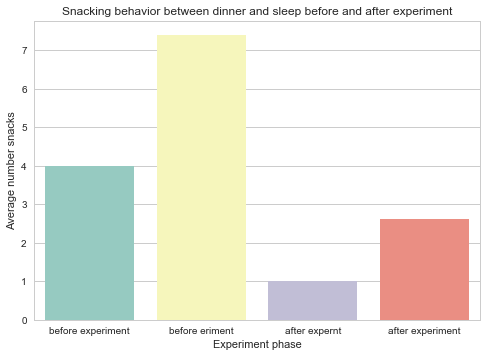

In [170]:
bef = np.mean(locrand_group['baselineA_diner_sleep'])
ax = sns.barplot(x=['before experiment', 'before eriment', 'after expernt', 'after experiment'], y=[(3 + 7 + 3 + 5)/4, bef,  (1 + 2 + 2 + 1)/4, aft])
ax.set(xlabel='Experiment phase', ylabel='Average number snacks', title='Snacking behavior between dinner and sleep before and after experiment')

In [173]:
df.endH_taal.value_counts()
df.endH_ziek.value_counts()

0.0    25
1.0     2
Name: endH_ziek, dtype: int64

Mean intentions2: 4.03703703704
Standard deviation intentions2: 1.26143602711


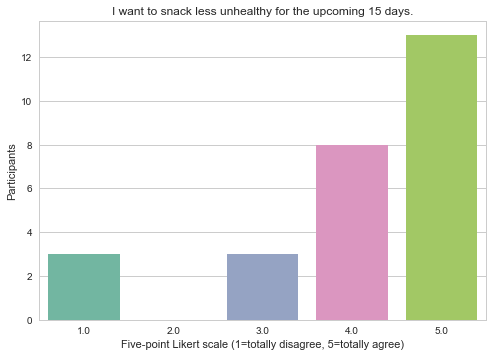

In [178]:
print 'Mean intentions2:', np.mean(df['baselineB_intentions2'])
print 'Standard deviation intentions2:', np.std(df['baselineB_intentions2'])

freq_intentions2 = df.baselineB_intentions2.value_counts()
xvalues = dict(freq_intentions2)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=totally agree)', ylabel='Participants', title='I want to snack less unhealthy for the upcoming 15 days.')

Mean success2: 3.18518518519
Standard deviation success2: 1.21828771877


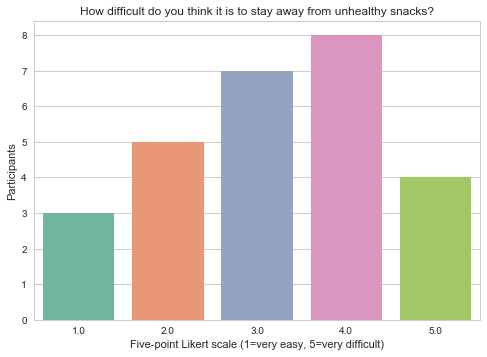

In [182]:
print 'Mean success2:', np.mean(df['baselineC_success2'])
print 'Standard deviation success2:', np.std(df['baselineC_success2'])

freq_success2 = df.baselineC_success2.value_counts()
ax = sns.barplot(x=freq_success2.index, y=freq_success2)
ax.set(xlabel='Five-point Likert scale (1=very easy, 5=very difficult)', ylabel='Participants', title='How difficult do you think it is to stay away from unhealthy snacks?')

# Strategy usage

## Before

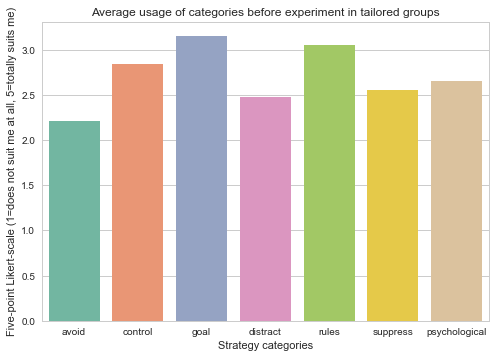

In [198]:
avoid_df = tailored_group[['strategiesA_avoid1', 'strategiesA_avoid2', 'strategiesA_avoid3', 'strategiesA_avoid4']]
control_df = tailored_group[['strategiesB_control1', 'strategiesB_control2', 'strategiesB_control3', 'strategiesB_control4']]
goals_df = tailored_group[['strategiesB_goals1', 'strategiesB_goals2', 'strategiesB_goals3', 'strategiesB_goals4']]
distraction_df = tailored_group[['strategiesC_distraction1', 'strategiesC_distraction2', 'strategiesC_distraction3', 'strategiesC_distraction4']]
rules_df = tailored_group[['strategiesC_rules1', 'strategiesC_rules2', 'strategiesC_rules3', 'strategiesC_rules4']]
suppression_df = tailored_group[['strategiesD_suppress1', 'strategiesD_suppress2', 'strategiesD_suppress3', 'strategiesD_suppress4']]
psy_df = tailored_group[['strategiesD_psychological1', 'strategiesD_psychological2', 'strategiesD_psychological3', 'strategiesD_psychological4']]

ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_df))/4, np.sum(np.mean(control_df))/4, np.sum(np.mean(goals_df))/4, 
                    np.sum(np.mean(distraction_df))/4, np.sum(np.mean(rules_df))/4, np.sum(np.mean(suppression_df))/4, 
                    np.sum(np.mean(psy_df))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories before experiment in tailored groups')

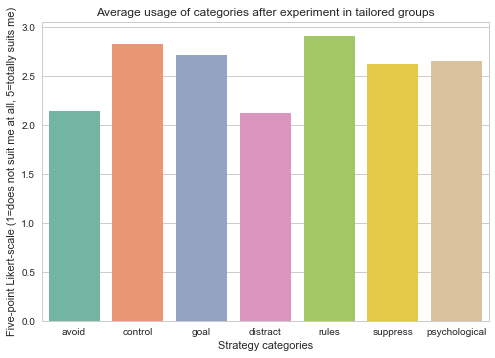

In [199]:
avoid_after = tailored_group[['endA_endAvoid1', 'endA_endAvoid2', 'endA_endAvoid3', 'endA_endAvoid4']]
control_after = tailored_group[['endB_endControl1', 'endB_endControl2', 'endB_endControl3', 'endB_endControl4']]
goals_after = tailored_group[['endB_endGoals1', 'endB_endGoals2', 'endB_endGoals3', 'endB_endGoals4']]
distraction_after = tailored_group[['endC_endDistraction1', 'endC_endDistraction2', 'endC_endDistraction3', 'endC_endDistraction4']]
rules_after = tailored_group[['endC_endRules1', 'endC_endRules2', 'endC_endRules3', 'endC_endRules4']]
suppression_after = tailored_group[['endD_endSuppress1', 'endD_endSuppress2', 'endD_endSuppress3', 'endD_endSuppress4']]
psy_after = tailored_group[['endD_endPsychological1', 'endD_endPsychological2', 'endD_endPsychological3', 'endD_endPsychological4']]

ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_after))/4, np.sum(np.mean(control_after))/4, np.sum(np.mean(goals_after))/4, 
                    np.sum(np.mean(distraction_after))/4, np.sum(np.mean(rules_after))/4, np.sum(np.mean(suppression_after))/4, 
                    np.sum(np.mean(psy_after))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories after experiment in tailored groups')

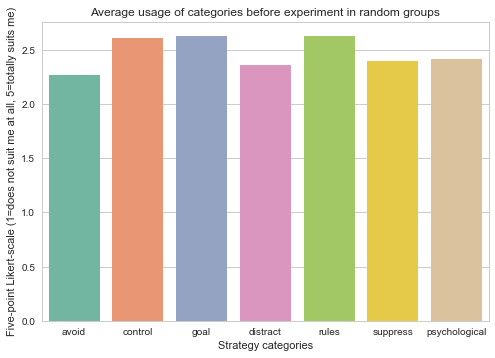

In [200]:
avoid_df = random_group[['strategiesA_avoid1', 'strategiesA_avoid2', 'strategiesA_avoid3', 'strategiesA_avoid4']]
control_df = random_group[['strategiesB_control1', 'strategiesB_control2', 'strategiesB_control3', 'strategiesB_control4']]
goals_df = random_group[['strategiesB_goals1', 'strategiesB_goals2', 'strategiesB_goals3', 'strategiesB_goals4']]
distraction_df = random_group[['strategiesC_distraction1', 'strategiesC_distraction2', 'strategiesC_distraction3', 'strategiesC_distraction4']]
rules_df = random_group[['strategiesC_rules1', 'strategiesC_rules2', 'strategiesC_rules3', 'strategiesC_rules4']]
suppression_df = random_group[['strategiesD_suppress1', 'strategiesD_suppress2', 'strategiesD_suppress3', 'strategiesD_suppress4']]
psy_df = random_group[['strategiesD_psychological1', 'strategiesD_psychological2', 'strategiesD_psychological3', 'strategiesD_psychological4']]

ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_df))/4, np.sum(np.mean(control_df))/4, np.sum(np.mean(goals_df))/4, 
                    np.sum(np.mean(distraction_df))/4, np.sum(np.mean(rules_df))/4, np.sum(np.mean(suppression_df))/4, 
                    np.sum(np.mean(psy_df))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories before experiment in random groups')

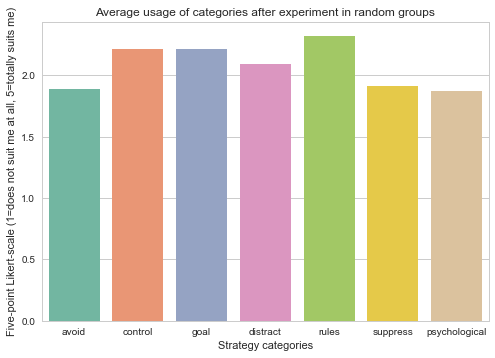

In [201]:
avoid_after = random_group[['endA_endAvoid1', 'endA_endAvoid2', 'endA_endAvoid3', 'endA_endAvoid4']]
control_after = random_group[['endB_endControl1', 'endB_endControl2', 'endB_endControl3', 'endB_endControl4']]
goals_after = random_group[['endB_endGoals1', 'endB_endGoals2', 'endB_endGoals3', 'endB_endGoals4']]
distraction_after = random_group[['endC_endDistraction1', 'endC_endDistraction2', 'endC_endDistraction3', 'endC_endDistraction4']]
rules_after = random_group[['endC_endRules1', 'endC_endRules2', 'endC_endRules3', 'endC_endRules4']]
suppression_after = random_group[['endD_endSuppress1', 'endD_endSuppress2', 'endD_endSuppress3', 'endD_endSuppress4']]
psy_after = random_group[['endD_endPsychological1', 'endD_endPsychological2', 'endD_endPsychological3', 'endD_endPsychological4']]

ax = sns.barplot(x=['avoid', 'control', 'goal', 'distract', 'rules', 'suppress', 'psychological'], 
                 y=[np.sum(np.mean(avoid_after))/4, np.sum(np.mean(control_after))/4, np.sum(np.mean(goals_after))/4, 
                    np.sum(np.mean(distraction_after))/4, np.sum(np.mean(rules_after))/4, np.sum(np.mean(suppression_after))/4, 
                    np.sum(np.mean(psy_after))/4])

ax.set(xlabel='Strategy categories', 
       ylabel='Five-point Likert-scale (1=does not suit me at all, 5=totally suits me)', 
       title='Average usage of categories after experiment in random groups')

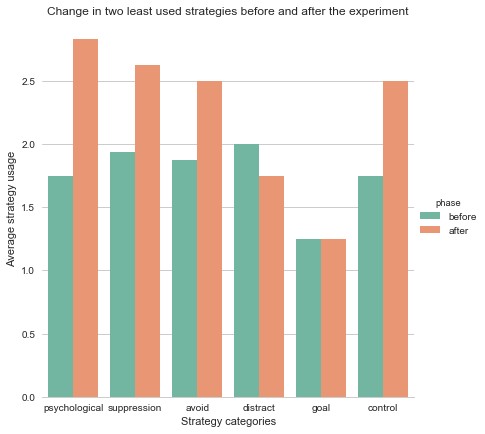

In [224]:
dfuserstrat = pd.DataFrame({'category': ['psychological', 'psychological', 'psychological',
                                        'suppression', 'suppression', 'suppression', 'suppression', 
                                        'avoid', 'avoid', 'distract', 'goal', 'control', 'psychological', 
                                        'psychological', 'psychological', 'suppression', 'suppression', 
                                        'suppression', 'suppression', 'avoid', 'avoid', 'distract', 'goal', 'control'], 
                            'usage': [6/4.0, 11/4.0, 4/4.0, 13/4.0, 7/4.0, 7/4.0, 4/4.0, 11/4.0, 4/4.0, 8/4.0, 5/4.0, 7/4.0,
                                     14/4.0, 12/4.0, 8/4.0, 19/4.0, 5/4.0, 10/4.0, 8/4.0, 13/4.0, 7/4.0, 7/4.0, 5/4.0, 10/4.0], 
                           'phase': ['before', 'before','before','before','before','before','before','before','before','before','before','before',
                                    'after','after','after','after','after','after','after','after','after','after','after','after']})

g = sns.factorplot(x="category", y="usage", hue="phase", data=dfuserstrat,
                   size=6, kind="bar", palette="Set2", ci=None)
g.despine(left=True)
g.set(xlabel='Strategy categories', ylabel='Average strategy usage', title='Change in two least used strategies before and after the experiment')

14.7692307692
11.4285714286
3.38461538462
2.28571428571


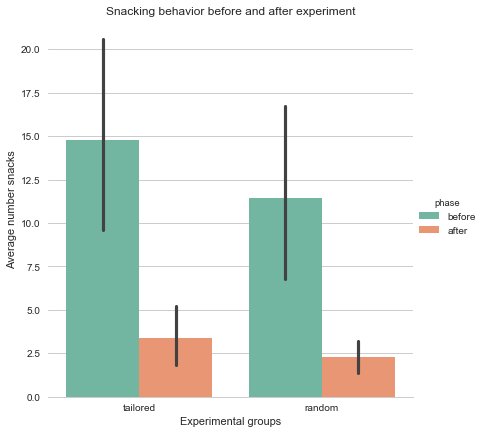

In [279]:
groups = []
phase = []
for i in range(2):
    for i in range(13):
        groups.append('tailored')

    for i in range(14):
        groups.append('random')

for i in range(27):
    phase.append('before')

for i in range(27):
    phase.append('after')
    
tailoredbegin = tailored_group['baselineA_awake_lunch'] + tailored_group['baselineA_lunch_diner'] + tailored_group['baselineA_diner_sleep'] 
randombegin = random_group['baselineA_awake_lunch'] + random_group['baselineA_lunch_diner'] + random_group['baselineA_diner_sleep'] 

print np.mean(tailoredbegin)
print np.mean(randombegin)
print np.mean(tailored_group['day_15'])
print np.mean(random_group['day_15'])

dfsnackstats = pd.DataFrame({'snacks': pd.concat([tailoredbegin, randombegin, tailored_group['day_15'], random_group['day_15']]), 
                             'group': groups, 'phase': phase})

g = sns.factorplot(x="group", y="snacks", hue="phase", data=dfsnackstats,
                   size=6, kind="bar", palette="Set2")
g.despine(left=True)
g.set(xlabel='Experimental groups', ylabel='Average number snacks', title='Snacking behavior before and after experiment')

13.1111111111
13.0
3.22222222222
2.61111111111


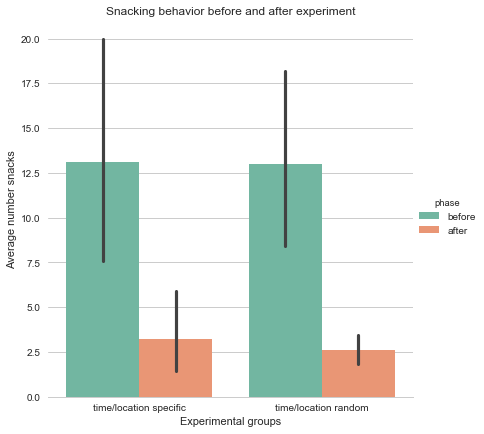

In [280]:
groups = []
phase = []
for i in range(2):
    for i in range(9):
        groups.append('time/location specific')

    for i in range(18):
        groups.append('time/location random')

for i in range(27):
    phase.append('before')

for i in range(27):
    phase.append('after')
    
locspecbegin = locspec_group['baselineA_awake_lunch'] + locspec_group['baselineA_lunch_diner'] + locspec_group['baselineA_diner_sleep'] 
locrandbegin = locrand_group['baselineA_awake_lunch'] + locrand_group['baselineA_lunch_diner'] + locrand_group['baselineA_diner_sleep'] 

print np.mean(locspecbegin)
print np.mean(locrandbegin)
print np.mean(locspec_group['day_15'])
print np.mean(locrand_group['day_15'])

dfsnackstats = pd.DataFrame({'snacks': pd.concat([locspecbegin, locrandbegin, locspec_group['day_15'], locrand_group['day_15']]), 
                            'group': groups, 'phase': phase})
g = sns.factorplot(x="group", y="snacks", hue="phase", data=dfsnackstats,
                   size=6, kind="bar", palette="Set2")
g.despine(left=True)
g.set(xlabel='Experimental groups', ylabel='Average number snacks', title='Snacking behavior before and after experiment')

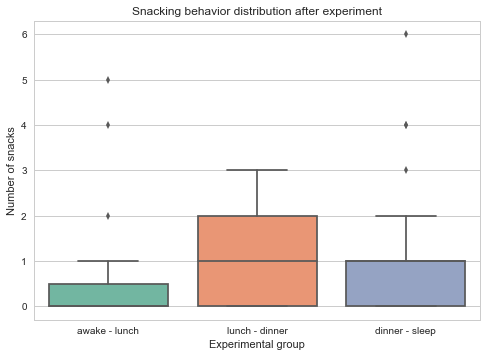

In [277]:
g = sns.boxplot(data=[df['day 15_awake_lunch'], df['day 15_lunch_diner'], df['day 15_diner_sleep']])
g.set(xlabel='Experimental group', ylabel='Number of snacks', title='Snacking behavior distribution after experiment')
g.set_xticklabels(["awake - lunch", "lunch - dinner", "dinner - sleep"])

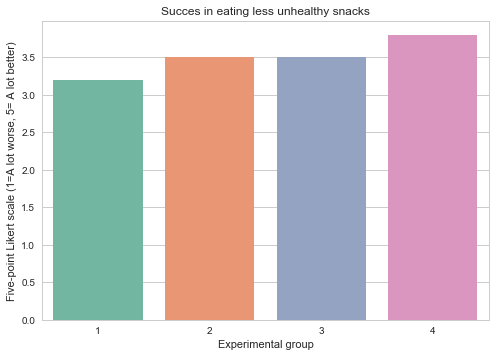

In [286]:
g = sns.barplot(x=df['controlGroup'], y=df['endE_betMin'], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes in eating less unhealthy snacks')

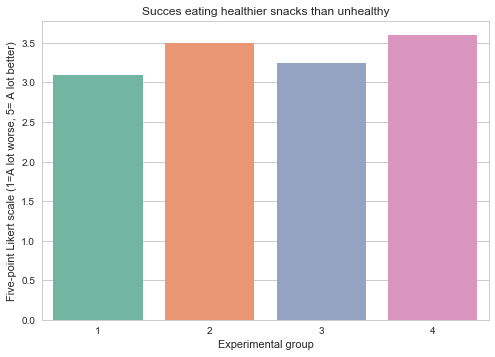

In [288]:
g = sns.barplot(x=df['controlGroup'], y=df['endE_betVerv'], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier snacks than unhealthy')

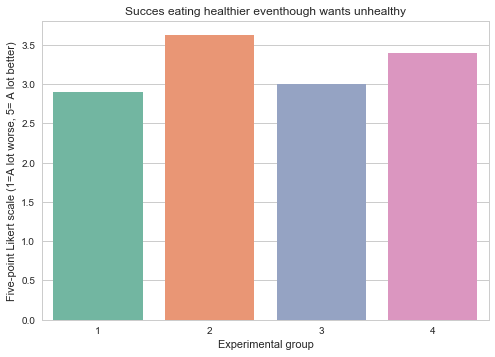

In [289]:
g = sns.barplot(x=df['controlGroup'], y=df['endE_betWeerst'], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=A lot worse, 5= A lot better)', title='Succes eating healthier eventhough wants unhealthy')

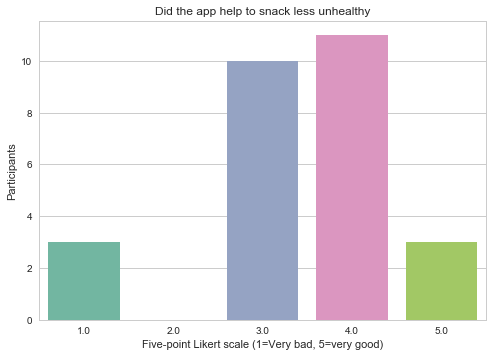

In [290]:
freq_apphulp = df.endG_appHulp.value_counts()
xvalues = dict(freq_apphulp)
xvalues[2.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Five-point Likert scale (1=Very bad, 5=very good)', ylabel='Participants', title='Did the app help to snack less unhealthy')

3.0    7
4.0    3
2.0    2
1.0    1
Name: endG_appTips, dtype: int64
2.0    5
4.0    4
3.0    4
5.0    1
Name: endG_appTips, dtype: int64


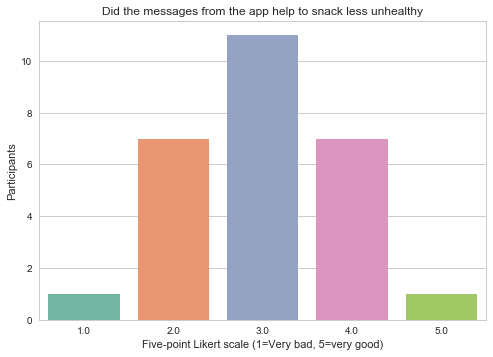

In [337]:
freq_apptips = df.endG_appTips.value_counts()
ax = sns.barplot(x=freq_apptips.index, y=freq_apptips)
ax.set(xlabel='Five-point Likert scale (1=Very bad, 5=very good)', ylabel='Participants', title='Did the messages from the app help to snack less unhealthy')

print tailored_group.endG_appTips.value_counts()
print random_group.endG_appTips.value_counts()

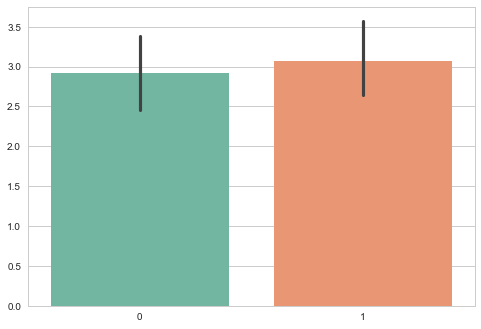

In [339]:
ax = sns.barplot(data=[tailored_group['endG_appTips'], random_group['endG_appTips']])

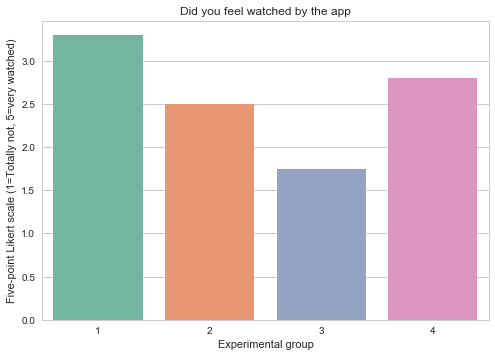

In [294]:
g = sns.barplot(x=df['controlGroup'], y=df['endG_appCont'], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Totally not, 5=very watched)', title='Did you feel watched by the app')

In [295]:
total_crash = np.sum(df['endG_appCrash'])
print total_crash

20.0


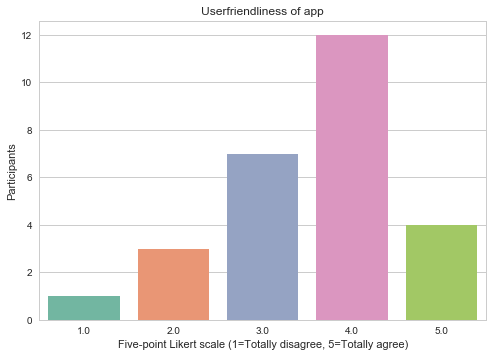

In [296]:
freq_userfriend = df.endG_userFriend.value_counts()
ax = sns.barplot(x=freq_userfriend.index, y=freq_userfriend)
ax.set(xlabel='Five-point Likert scale (1=Totally disagree, 5=Totally agree)', ylabel='Participants', title='Userfriendliness of app')

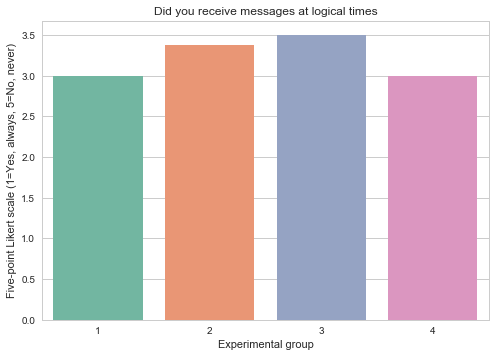

In [298]:
g = sns.barplot(x=df['controlGroup'], y=df['endG_appLog'], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Yes, always, 5=No, never)', title='Did you receive messages at logical times')

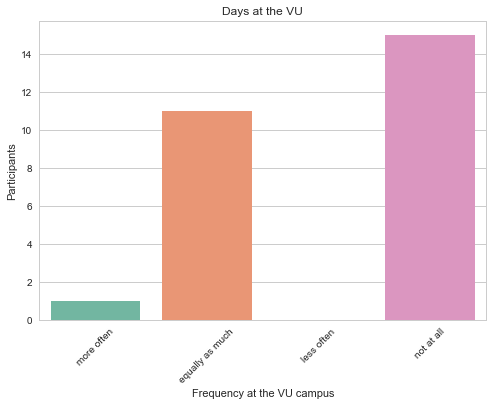

In [299]:
freq_VU = df.endH_dagVU.value_counts()
xvalues = dict(freq_VU)
xvalues[3.0] = 0
ax = sns.barplot(x=xvalues.keys(), y=xvalues.values())
ax.set(xlabel='Frequency at the VU campus', ylabel='Participants', title='Days at the VU')
ax.set_xticklabels(['more often', 'equally as much', 'less often', 'not at all'], rotation=45)

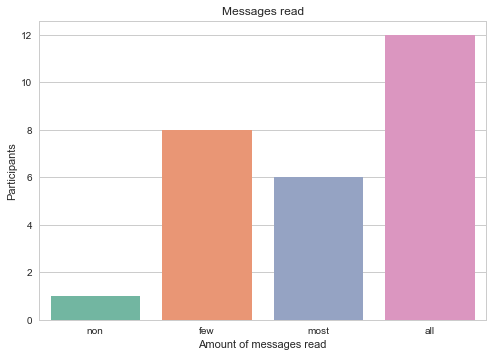

In [300]:
freq_appber = df.endG_appBer.value_counts()
ax = sns.barplot(x=freq_appber.index, y=freq_appber)
ax.set(xlabel='Amount of messages read', ylabel='Participants', title='Messages read')
ax.set_xticklabels(['non', 'few', 'most', 'all'])

0.0555555555556



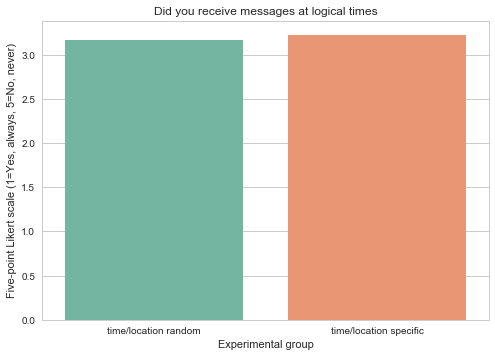

In [310]:
g = sns.barplot(data=[locrand_group['endG_appLog'], locspec_group['endG_appLog']], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Yes, always, 5=No, never)', title='Did you receive messages at logical times')
g.set_xticklabels(['time/location random', 'time/location specific'])


print np.mean(locspec_group['endG_appLog']) - np.mean(locrand_group['endG_appLog']) 

-0.611111111111


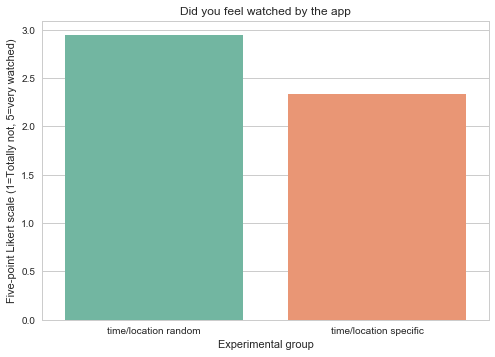

In [312]:
g = sns.barplot(data=[locrand_group['endG_appCont'], locspec_group['endG_appCont']], ci=None)
g.set(xlabel='Experimental group', ylabel='Five-point Likert scale (1=Totally not, 5=very watched)', title='Did you feel watched by the app')
g.set_xticklabels(['time/location random', 'time/location specific'])


print np.mean(locspec_group['endG_appCont']) - np.mean(locrand_group['endG_appCont'])

0.0    4
2.0    1
Name: endG_appCrash, dtype: int64


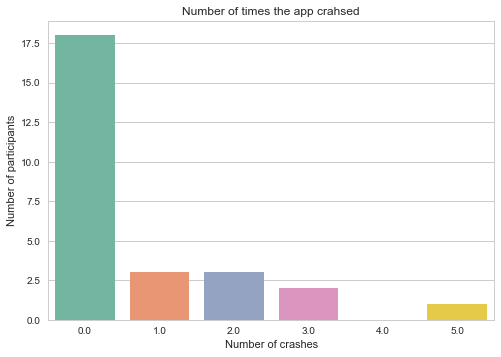

In [324]:
df.endG_appCrash.value_counts()

# print group1.endG_appCrash.value_counts()
print group4.endG_appCrash.value_counts()

xvalues = dict(df.endG_appCrash.value_counts())
xvalues[4.0] = 0
g = sns.barplot(x=xvalues.keys(), y=xvalues.values())
g.set(xlabel='Number of crashes', ylabel='Number of participants', title='Number of times the app crahsed')

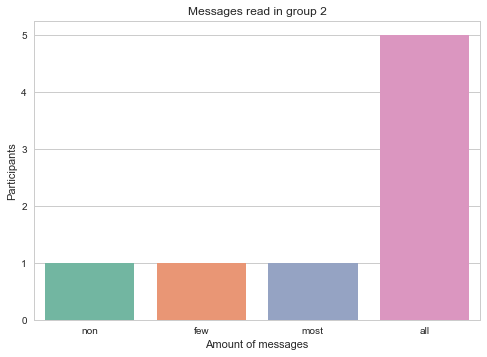

In [328]:
freq_appber = group2.endG_appBer.value_counts()
ax = sns.barplot(x=freq_appber.index, y=freq_appber)
ax.set(xlabel='Amount of messages', ylabel='Participants', title='Messages read in group 2')
ax.set_xticklabels(['non', 'few', 'most', 'all'])

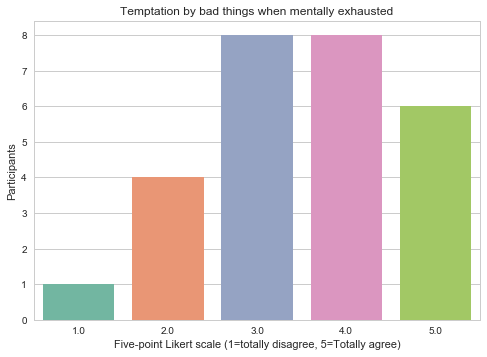

In [329]:
freq_personality10 = df.baselineE_personality10.value_counts()
ax = sns.barplot(x=freq_personality10.index, y=freq_personality10)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Temptation by bad things when mentally exhausted')

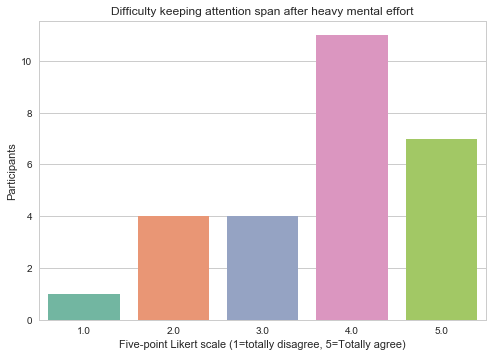

In [332]:
freq_personality5 = df.baselineE_personality5.value_counts()
ax = sns.barplot(x=freq_personality5.index, y=freq_personality5)
ax.set(xlabel='Five-point Likert scale (1=totally disagree, 5=Totally agree)', ylabel='Participants', title='Difficulty keeping attention span after heavy mental effort')

In [335]:
print group3['baselineD_location']
print group4['baselineD_location']

1      1.0
84     3.0
97     4.0
123    4.0
Name: baselineD_location, dtype: float64
0     4.0
2     4.0
18    4.0
39    1.0
67    1.0
Name: baselineD_location, dtype: float64
